<a href="https://colab.research.google.com/github/HongSeongMo/Airbnb/blob/main/learning_plus_training1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
 #path 하위에 dir_name 디렉토리 생성
def make_directory(path, dir_name):
    if dir_name not in os.listdir(path):
        os.mkdir(f'{path}/{dir_name}')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
drive_path = 'drive/MyDrive'

#letuin 디렉토리 생성
make_directory(drive_path, 'letuin')

# letuin 디렉토리 내 airbnb 생성
make_directory(f'{drive_path}/letuin','airbnb')

# airbnb 디렉토리 내 data 생성
make_directory(f'{drive_path}/letuin/airbnb','data')

# airbnb 디렉토리 내 model 생성
make_directory(f'{drive_path}/letuin/airbnb','model')



구글드라이브에 데이터 다운받기


*   샘플데이터:2021-10-10/런던 에어비앤비 데이터
*   데이터 종류

   *listings:객실 목록

   *calendar:날짜별 판매정보

In [4]:
import requests

In [5]:
# url설정
url_listings = 'http://data.insideairbnb.com/united-kingdom/england/london/2023-12-10/data/listings.csv.gz'
url_calendar = 'http://data.insideairbnb.com/united-kingdom/england/london/2023-12-10/data/calendar.csv.gz'

# 파일명 설정
file_listings = 'listings_london_202312.csv.gz'
file_calendar = 'calendar_london_202312.csv.gz'

# path 설정
path = f'{drive_path}/letuin/airbnb/data'

In [6]:
# download listing data
with open(f'{path}/{file_listings}',"wb") as f:
    r = requests.get(url_listings)
    f.write(r.content)

# download calendar data
with open(f'{path}/{file_calendar}',"wb") as f:
    r = requests.get(url_calendar)
    f.write(r.content)

다운받은 데이터 확인


*   스키마:
*   listings:에어비앤비 객실 메타


*   calendar:날짜별 판매정보





In [7]:
# import pandas
import pandas as pd

# pandas 세팅
# display:소수점 자리수 세팅
pd.options.display.float_format = '{:.2f}'.format

listing 데이터

In [8]:
listing_df = pd.read_csv(f'{path}/{file_listings}', compression='gzip')

In [9]:
listing_df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,198258,https://www.airbnb.com/rooms/198258,20231210055232,2023-12-10,city scrape,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,NaN,"I live in Barking town centre, at one time the...",https://a0.muscache.com/pictures/airflow/Hosti...,967537,...,4.88,4.45,4.68,NaN,f,1,0,1,0,0.27
1,33332,https://www.airbnb.com/rooms/33332,20231210055232,2023-12-10,city scrape,"Home in St Margaret's, Isleworth · ★4.40 · 1 ...",NaN,Peaceful and friendly.,https://a0.muscache.com/pictures/miso/Hosting-...,144444,...,4.53,4.68,4.26,NaN,f,2,0,2,0,0.12
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,...,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45
3,284603,https://www.airbnb.com/rooms/284603,20231210055232,2023-12-11,previous scrape,Rental unit in London · ★4.83 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/3246231/8e9b1...,1481851,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.04
4,89870,https://www.airbnb.com/rooms/89870,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.65 · 1 bedroom · 1 ...,NaN,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.91,4.73,4.50,NaN,f,3,2,1,0,0.89


In [10]:
calendar_df = pd.read_csv(f'{path}/{file_calendar}', compression='gzip')

<ipython-input-10-278dd35f2f2b>:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar_df = pd.read_csv(f'{path}/{file_calendar}', compression='gzip')


In [11]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,13913,2023-12-10,f,NaN,NaN,1.00,29.00
1,13913,2023-12-11,t,NaN,NaN,1.00,29.00
2,13913,2023-12-12,t,NaN,NaN,1.00,29.00
3,13913,2023-12-13,t,NaN,NaN,1.00,29.00
4,13913,2023-12-14,t,NaN,NaN,1.00,29.00


에어비앤비 데이터 살펴보기

listing 데이터

.head

In [12]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,198258,https://www.airbnb.com/rooms/198258,20231210055232,2023-12-10,city scrape,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,NaN,"I live in Barking town centre, at one time the...",https://a0.muscache.com/pictures/airflow/Hosti...,967537,...,4.88,4.45,4.68,NaN,f,1,0,1,0,0.27
1,33332,https://www.airbnb.com/rooms/33332,20231210055232,2023-12-10,city scrape,"Home in St Margaret's, Isleworth · ★4.40 · 1 ...",NaN,Peaceful and friendly.,https://a0.muscache.com/pictures/miso/Hosting-...,144444,...,4.53,4.68,4.26,NaN,f,2,0,2,0,0.12
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,...,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45
3,284603,https://www.airbnb.com/rooms/284603,20231210055232,2023-12-11,previous scrape,Rental unit in London · ★4.83 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/3246231/8e9b1...,1481851,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.04
4,89870,https://www.airbnb.com/rooms/89870,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.65 · 1 bedroom · 1 ...,NaN,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.91,4.73,4.50,NaN,f,3,2,1,0,0.89


.shape

In [13]:
listing_df.shape

(91778, 75)

.info

In [14]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91778 entries, 0 to 91777
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            91778 non-null  int64  
 1   listing_url                                   91778 non-null  object 
 2   scrape_id                                     91778 non-null  int64  
 3   last_scraped                                  91778 non-null  object 
 4   source                                        91778 non-null  object 
 5   name                                          91778 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         48999 non-null  object 
 8   picture_url                                   91767 non-null  object 
 9   host_id                                       91778 non-null 

calendar 데이터

In [15]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,13913,2023-12-10,f,NaN,NaN,1.00,29.00
1,13913,2023-12-11,t,NaN,NaN,1.00,29.00
2,13913,2023-12-12,t,NaN,NaN,1.00,29.00
3,13913,2023-12-13,t,NaN,NaN,1.00,29.00
4,13913,2023-12-14,t,NaN,NaN,1.00,29.00


In [16]:
calendar_df.shape

(33500650, 7)

In [17]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33500650 entries, 0 to 33500649
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.7+ GB


date 범위

In [18]:
date_start = calendar_df.date.min()
date_end = calendar_df.date.max()

print(f'시작 날짜: {date_start}')
print(f"종료 날짜: {date_end}")

시작 날짜: 2023-12-10
종료 날짜: 2024-12-23


unique key 확인

In [19]:
# unique key 확인을 위한 중복 체크
key = ['listing_id', 'date']

calendar_df[calendar_df.duplicated(key)]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights


한 객실의 calendar 데이터 샘플

In [20]:
calendar_df[calendar_df.listing_id==33332]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2920,33332,2023-12-10,t,NaN,NaN,2.00,21.00
3335,33332,2023-12-11,t,NaN,NaN,2.00,21.00
3336,33332,2023-12-12,t,NaN,NaN,2.00,21.00
3337,33332,2023-12-13,t,NaN,NaN,2.00,21.00
3338,33332,2023-12-14,t,NaN,NaN,2.00,21.00
...,...,...,...,...,...,...,...
4368,33332,2024-12-04,t,NaN,NaN,2.00,21.00
4652,33332,2024-12-05,t,NaN,NaN,2.00,21.00
4653,33332,2024-12-06,t,NaN,NaN,2.00,21.00
4654,33332,2024-12-07,t,NaN,NaN,2.00,21.00


객실별 등록날짜 count

In [21]:
listing_count = calendar_df.groupby('listing_id').count()['date'].reset_index(drop = False)

listing_count.head()

,listing_id,date
0,13913,365
1,15400,365
2,17402,365
3,24328,365
4,25123,365


In [22]:
# 리스팅별 날짜 count
listing_count.date.value_counts()

365    89708
366     2068
342        1
Name: date, dtype: int64

In [23]:
# 리스팅별 날짜 count 상대 비율
listing_count.date.value_counts(normalize=True)

365   0.98
366   0.02
342   0.00
Name: date, dtype: float64

avalilable days per listing

In [24]:
listing_available_count = calendar_df[calendar_df.available=='t'].groupby(['listing_id']).count()['date'].reset_index(drop=False)

In [25]:
listing_available_count.head()

,listing_id,date
0,13913,357
1,15400,18
2,17402,300
3,31036,246
4,33332,365


<Axes: >

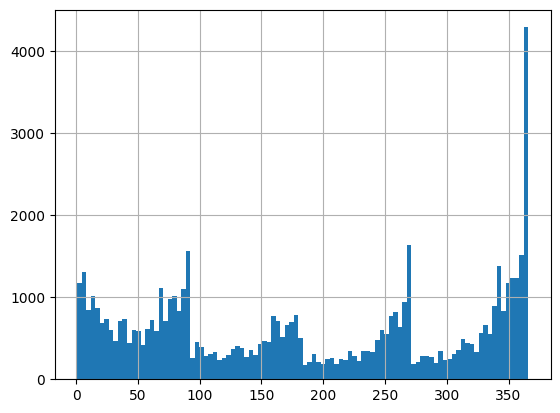

In [26]:
listing_available_count['date'].hist(bins=100)

예측 데이터 가공 : 1년간 매출

* price/adjusted_price

가격 필드 전처리

In [27]:
# adjusted_price into float
calendar_df['adjusted_price'] = calendar_df['adjusted_price'].str.replace('$', '')
calendar_df['adjusted_price'] = calendar_df['adjusted_price'].str.replace(',', '')
calendar_df['adjusted_price'] = calendar_df['adjusted_price'].astype(float)

calendar_df['adjusted_price'].head()

<ipython-input-27-42f8368fccdc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_df['adjusted_price'] = calendar_df['adjusted_price'].str.replace('$', '')


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: adjusted_price, dtype: float64

객실매출 합산

In [28]:
# revenue by listing_id
revenue_df = calendar_df[calendar_df['available']=='f'].groupby('listing_id').adjusted_price.sum()

revenue_df.head()

listing_id
13913   0.00
15400   0.00
17402   0.00
24328   0.00
25123   0.00
Name: adjusted_price, dtype: float64

In [29]:
# reset index
revenue_df = revenue_df.reset_index(drop=False)
revenue_df.head()

,listing_id,adjusted_price
0,13913,0.00
1,15400,0.00
2,17402,0.00
3,24328,0.00
4,25123,0.00


In [30]:
# revenue column

revenue_df = revenue_df.rename(columns={"adjusted_price" : "revenue"})
revenue_df.head()

,listing_id,revenue
0,13913,0.00
1,15400,0.00
2,17402,0.00
3,24328,0.00
4,25123,0.00


.shape

In [31]:
# data size
revenue_df.shape

(89631, 2)

.describe

In [32]:
# revenue 기술통계(단위 : 달러)
revenue_df.revenue.describe()

count     89631.00
mean         62.96
std        6947.62
min           0.00
25%           0.00
50%           0.00
75%           0.00
max     1401522.00
Name: revenue, dtype: float64

.hist

<Axes: >

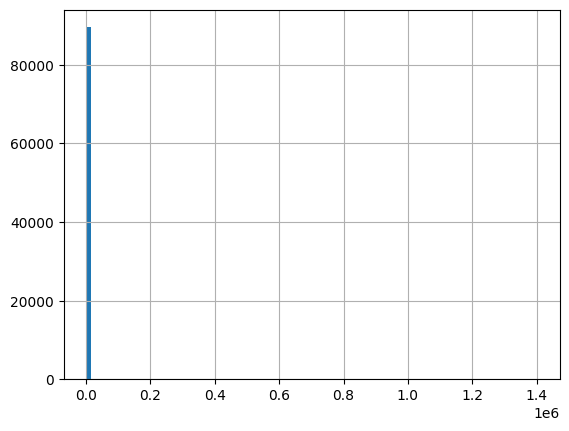

In [33]:
# revenue 히스토그램
revenue_df.revenue.hist(bins=100)

<Axes: >

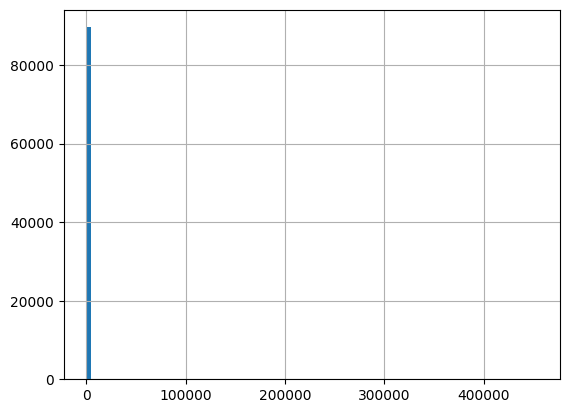

In [34]:
# revenue 히스토그램 : 아웃라이어 제외 후
revenue_df[revenue_df.revenue <5*10**5].revenue.hist(bins=100)

In [35]:
# 매출이 0인 객실수
revenue_df[revenue_df.revenue==0].shape

(89612, 2)

<Axes: >

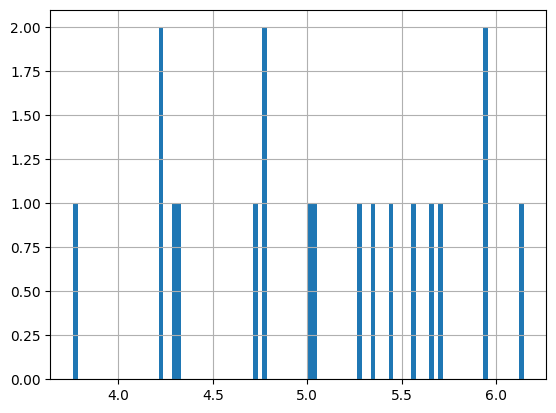

In [36]:
# revenue 히스토그램 : 로그변환 후
import numpy as np

np.log10(revenue_df[revenue_df.revenue > 0].revenue).hist(bins=100)

3강. 학습 데이터 세팅

inside airbnb 데이터 읽기
*   스키마:
*   listings:에어비액비 객실 메타
    *   feature(독립변수)
*   calendar:날짜별 판매정보
    *   target value(종속변수)    

In [37]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91778 entries, 0 to 91777
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            91778 non-null  int64  
 1   listing_url                                   91778 non-null  object 
 2   scrape_id                                     91778 non-null  int64  
 3   last_scraped                                  91778 non-null  object 
 4   source                                        91778 non-null  object 
 5   name                                          91778 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         48999 non-null  object 
 8   picture_url                                   91767 non-null  object 
 9   host_id                                       91778 non-null 

In [38]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33500650 entries, 0 to 33500649
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.7+ GB


Feature Engineering
*   listing_df 데이터 프레임을 feature(독립변수)로 활용

Primary Key 체크

In [39]:
# 필드 리스트
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

listng id 중복 체크

In [40]:
# id 중복 체크 : 중복없음
listing_df[listing_df.duplicated('id')].shape

(0, 75)

host id 중복 체크

In [41]:
# host_id 중복 체크
listing_df[listing_df.duplicated('host_id')].shape

(36435, 75)

In [42]:
# host_id 중복 비율
print(f"{(listing_df[listing_df.duplicated('host_id')].shape[0]/listing_df.shape[0]*100):.2f}%")

39.70%


In [43]:
# neighborhood_cleansed ; 지역정보
listing_df.neighbourhood_cleansed.unique()

array(['Barking and Dagenham', 'Richmond upon Thames', 'Barnet',
       'Kensington and Chelsea', 'Islington', 'Waltham Forest', 'Brent',
       'Lambeth', 'Camden', 'Hammersmith and Fulham', 'Hounslow',
       'Tower Hamlets', 'Lewisham', 'Bromley', 'Ealing', 'Hackney',
       'Enfield', 'Southwark', 'Merton', 'Kingston upon Thames',
       'Wandsworth', 'Westminster', 'Greenwich', 'Haringey', 'Croydon',
       'City of London', 'Sutton', 'Redbridge', 'Newham', 'Harrow',
       'Havering', 'Bexley', 'Hillingdon'], dtype=object)

In [44]:
# id 칼럼 리스트
id_col = ['id', 'host_id', 'neighbourhood_cleansed']

feature 분류 및 선택
*   변수의 종류
    *   범주형(categorical variable)
        *   binary:True of False
        *   객실유형 : 독채, 원룸, 투룸, 쓰리룸
    *   연속형(continuous variable)
        *   가격, 리뷰스, 호스팅 기간 등    

null 값이 많은 변수 제외

In [45]:
# null 값이 많은 feature 제거
feature_null = []
listing_count = listing_df.shape[0]
for col in listing_df.columns:
    non_null_count = listing_df[listing_df[col].notnull()].shape[0]
    if non_null_count / listing_count < 0.1:
        print(f"{col}:{non_null_count}")
        feature_null.append(col)

feature_null

description:0
neighbourhood_group_cleansed:0
bathrooms:0
bedrooms:19
calendar_updated:0
license:0


['description',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'bedrooms',
 'calendar_updated',
 'license']

데이터 타입 확인
*   숫자형 : int64, float64
*   문자형 : object

In [46]:
listing_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

숫자형 변수 추출

In [47]:
# 숫자형 변수 추출
feature_number = []
listing_dtype = listing_df.dtypes
for col in listing_df.columns:
    if (listing_dtype[col] == int) | (listing_dtype[col] == float):
        feature_number.append(col)

feature_number

['id',
 'scrape_id',
 'description',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

cardinality 확인

In [48]:
# unique 값이 적은 feature
feature_number_low_cardinality = []
for col in feature_number:
    cardinality = len(listing_df[col].unique())
    print(f"{col}:{cardinality}")
    if cardinality < 5:
        feature_number_low_cardinality.append(col)

feature_number_low_cardinality

id:91778
scrape_id:1
description:1
host_id:55343
host_listings_count:135
host_total_listings_count:185
neighbourhood_group_cleansed:1
latitude:46900
longitude:56795
accommodates:16
bathrooms:1
bedrooms:7
beds:25
minimum_nights:121
maximum_nights:302
minimum_minimum_nights:130
maximum_minimum_nights:135
minimum_maximum_nights:289
maximum_maximum_nights:340
minimum_nights_avg_ntm:801
maximum_nights_avg_ntm:1733
calendar_updated:1
availability_30:31
availability_60:61
availability_90:91
availability_365:366
number_of_reviews:500
number_of_reviews_ltm:148
number_of_reviews_l30d:20
review_scores_rating:191
review_scores_accuracy:186
review_scores_cleanliness:209
review_scores_checkin:189
review_scores_communication:174
review_scores_location:175
review_scores_value:202
license:1
calculated_host_listings_count:90
calculated_host_listings_count_entire_homes:85
calculated_host_listings_count_private_rooms:46
calculated_host_listings_count_shared_rooms:9
reviews_per_month:930


['scrape_id',
 'description',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'license']

In [49]:
# low cardinality 데이터 샘플
listing_df[feature_number_low_cardinality].head()

,scrape_id,description,neighbourhood_group_cleansed,bathrooms,calendar_updated,license
0,20231210055232,NaN,NaN,NaN,NaN,NaN
1,20231210055232,NaN,NaN,NaN,NaN,NaN
2,20231210055232,NaN,NaN,NaN,NaN,NaN
3,20231210055232,NaN,NaN,NaN,NaN,NaN
4,20231210055232,NaN,NaN,NaN,NaN,NaN


In [50]:
# 유효한 필드 추출
feature_number = list(set(feature_number) - set(id_col) - set(feature_null) - set(feature_number_low_cardinality))

feature_number

['latitude',
 'review_scores_communication',
 'beds',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'minimum_nights_avg_ntm',
 'number_of_reviews_ltm',
 'minimum_nights',
 'longitude',
 'number_of_reviews_l30d',
 'review_scores_value',
 'availability_90',
 'availability_365',
 'maximum_minimum_nights',
 'review_scores_location',
 'maximum_nights',
 'minimum_minimum_nights',
 'availability_60',
 'reviews_per_month',
 'availability_30',
 'minimum_maximum_nights',
 'accommodates',
 'number_of_reviews',
 'review_scores_checkin',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'maximum_nights_avg_ntm',
 'host_total_listings_count',
 'host_listings_count',
 'maximum_maximum_nights']

문자형 변수 추출

In [51]:
# 문자형 변수 추출
feature_string = []
for col in listing_df.columns:
    cardinality = len(listing_df[col].unique())
    if listing_df.dtypes[col] == object:
        print(f"{col}:{cardinality}")
        feature_string.append(col)

listing_url:91778
last_scraped:4
source:2
name:21551
neighborhood_overview:39640
picture_url:89269
host_url:55343
host_name:15482
host_since:4863
host_location:1693
host_about:24554
host_response_time:5
host_response_rate:91
host_acceptance_rate:101
host_is_superhost:3
host_thumbnail_url:53204
host_picture_url:53204
host_neighbourhood:644
host_verifications:9
host_has_profile_pic:3
host_identity_verified:3
neighbourhood:868
neighbourhood_cleansed:33
property_type:100
room_type:4
bathrooms_text:51
amenities:1
price:1458
has_availability:3
calendar_last_scraped:4
first_review:4030
last_review:3090
instant_bookable:2


In [52]:
# 문자형 데이터 샘플
listing_df[feature_string].head()

,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,https://www.airbnb.com/rooms/198258,2023-12-10,city scrape,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,"I live in Barking town centre, at one time the...",https://a0.muscache.com/pictures/airflow/Hosti...,https://www.airbnb.com/users/show/967537,Ryan,2011-08-14,"Barking, United Kingdom",...,Private room in rental unit,Private room,1 shared bath,[],$67.00,t,2023-12-10,2011-08-22,2023-03-16,f
1,https://www.airbnb.com/rooms/33332,2023-12-10,city scrape,"Home in St Margaret's, Isleworth · ★4.40 · 1 ...",Peaceful and friendly.,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/144444,Chi-Chi,2010-06-14,"Isleworth, United Kingdom",...,Private room in home,Private room,1 private bath,[],$140.00,t,2023-12-10,2010-10-16,2022-08-01,f
2,https://www.airbnb.com/rooms/42010,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,https://www.airbnb.com/users/show/157884,Agri & Roger,2010-07-04,"London, United Kingdom",...,Private room in home,Private room,1 shared bath,[],$65.00,t,2023-12-10,2010-09-22,2023-12-03,t
3,https://www.airbnb.com/rooms/284603,2023-12-11,previous scrape,Rental unit in London · ★4.83 · 1 bedroom · 1 ...,NaN,https://a0.muscache.com/pictures/3246231/8e9b1...,https://www.airbnb.com/users/show/1481851,Tania,2011-12-07,"London, United Kingdom",...,Entire rental unit,Entire home/apt,1.5 baths,[],$297.00,f,2023-12-11,2012-07-16,2022-07-04,f
4,https://www.airbnb.com/rooms/89870,2023-12-10,city scrape,Rental unit in London · ★4.65 · 1 bedroom · 1 ...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, United Kingdom",...,Entire rental unit,Entire home/apt,1 bath,[],$149.00,t,2023-12-10,2011-08-14,2023-12-03,f


In [53]:
# 일부 문자 데이터 제외
feature_string = ['last_scraped','host_since', 'host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','room_type','price','has_availability','calendar_last_scraped','first_review','last_review','instant_bookable']

cardinality 확인

In [54]:
# 복잡도 낮은 변수 추출
feature_string_low_cardinality = []
for col in feature_string:
    cardinality = len(listing_df[col].unique())
    if cardinality < 10:
        feature_string_low_cardinality.append(col)

feature_string_low_cardinality

['last_scraped',
 'host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'room_type',
 'has_availability',
 'calendar_last_scraped',
 'instant_bookable']

In [55]:
listing_df[feature_string_low_cardinality].head()

,last_scraped,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,has_availability,calendar_last_scraped,instant_bookable
0,2023-12-10,within an hour,f,t,t,Private room,t,2023-12-10,f
1,2023-12-10,NaN,f,t,f,Private room,t,2023-12-10,f
2,2023-12-10,within a few hours,t,t,t,Private room,t,2023-12-10,t
3,2023-12-11,NaN,f,t,t,Entire home/apt,f,2023-12-11,f
4,2023-12-10,within an hour,f,t,t,Entire home/apt,t,2023-12-10,f


binary feature

In [56]:
# binary feature
feature_binary = ['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','instant_bookable']

In [57]:
# binary feature
listing_df[feature_binary]

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,f,t,t,t,f
1,f,t,f,t,f
2,t,t,t,t,t
3,f,t,t,f,f
4,f,t,t,t,f
...,...,...,...,...,...
91773,f,t,t,t,f
91774,f,t,t,t,t
91775,f,t,t,t,f
91776,f,t,t,t,f


categorical feature

In [58]:
# room type : unique value
listing_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [59]:
# host_response_time : unique value
listing_df.host_response_time.unique()

array(['within an hour', nan, 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [60]:
# categorical feature
feature_category = ['host_response_time','room_type']

In [61]:
# categorical feature
listing_df[feature_category]

,host_response_time,room_type
0,within an hour,Private room
1,NaN,Private room
2,within a few hours,Private room
3,NaN,Entire home/apt
4,within an hour,Entire home/apt
...,...,...
91773,within a few hours,Entire home/apt
91774,within an hour,Entire home/apt
91775,within an hour,Entire home/apt
91776,a few days or more,Private room


time feature

In [62]:
# 나머지 변수 확인
listing_df[list(set(feature_string)- set(id_col) - set(feature_null) - set(feature_binary) - set(feature_category))]

,last_scraped,first_review,last_review,host_since,calendar_last_scraped,host_response_rate,price,host_acceptance_rate
0,2023-12-10,2011-08-22,2023-03-16,2011-08-14,2023-12-10,100%,$67.00,75%
1,2023-12-10,2010-10-16,2022-08-01,2010-06-14,2023-12-10,NaN,$140.00,NaN
2,2023-12-10,2010-09-22,2023-12-03,2010-07-04,2023-12-10,100%,$65.00,100%
3,2023-12-11,2012-07-16,2022-07-04,2011-12-07,2023-12-11,NaN,$297.00,100%
4,2023-12-10,2011-08-14,2023-12-03,2009-11-16,2023-12-10,90%,$149.00,85%
...,...,...,...,...,...,...,...,...
91773,2023-12-11,NaN,NaN,2023-02-17,2023-12-11,100%,$500.00,72%
91774,2023-12-10,2023-08-27,2023-09-10,2018-08-22,2023-12-10,100%,$289.00,100%
91775,2023-12-11,2023-09-17,2023-10-08,2023-07-16,2023-12-11,100%,$400.00,95%
91776,2023-12-10,NaN,NaN,2016-01-25,2023-12-10,0%,$60.00,0%


In [63]:
# time feature('last_scraped'는 제외)
feature_time = ['host_since', 'last_review','first_review']

In [64]:
listing_df[feature_time].head()

,host_since,last_review,first_review
0,2011-08-14,2023-03-16,2011-08-22
1,2010-06-14,2022-08-01,2010-10-16
2,2010-07-04,2023-12-03,2010-09-22
3,2011-12-07,2022-07-04,2012-07-16
4,2009-11-16,2023-12-03,2011-08-14


continuous feature

In [65]:
# continuous feature
feature_continuous = ['price','host_response_rate','host_acceptance_rate']

In [66]:
listing_df[feature_continuous]

,price,host_response_rate,host_acceptance_rate
0,$67.00,100%,75%
1,$140.00,NaN,NaN
2,$65.00,100%,100%
3,$297.00,NaN,100%
4,$149.00,90%,85%
...,...,...,...
91773,$500.00,100%,72%
91774,$289.00,100%,100%
91775,$400.00,100%,95%
91776,$60.00,0%,0%


feature list 정리
*   id : id_col
*   숫자형 : feature_number
*   문자형 : feature_binary, feature_category, feature_time, feature_continuous

feature 전처리

In [67]:
# feature data
feature_df = listing_df[id_col + feature_number + feature_binary + feature_category + feature_time + feature_continuous].copy()
feature_df.head()

,id,host_id,neighbourhood_cleansed,latitude,review_scores_communication,beds,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,minimum_nights_avg_ntm,number_of_reviews_ltm,...,has_availability,instant_bookable,host_response_time,room_type,host_since,last_review,first_review,price,host_response_rate,host_acceptance_rate
0,198258,967537,Barking and Dagenham,51.53,4.88,1.00,1,0,2.00,1,...,t,f,within an hour,Private room,2011-08-14,2023-03-16,2011-08-22,$67.00,100%,75%
1,33332,144444,Richmond upon Thames,51.46,4.53,1.00,2,0,2.00,0,...,t,f,NaN,Private room,2010-06-14,2022-08-01,2010-10-16,$140.00,NaN,NaN
2,42010,157884,Barnet,51.59,4.95,1.00,2,0,4.00,29,...,t,t,within a few hours,Private room,2010-07-04,2023-12-03,2010-09-22,$65.00,100%,100%
3,284603,1481851,Kensington and Chelsea,51.51,5.00,1.00,0,0,14.00,0,...,f,f,NaN,Entire home/apt,2011-12-07,2022-07-04,2012-07-16,$297.00,NaN,100%
4,89870,54730,Islington,51.57,4.91,1.00,1,0,1.00,15,...,t,f,within an hour,Entire home/apt,2009-11-16,2023-12-03,2011-08-14,$149.00,90%,85%


binary variable
*   문자를 숫자로 변환(t=>1, f=>0)

In [68]:
feature_df[feature_binary].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,f,t,t,t,f
1,f,t,f,t,f
2,t,t,t,t,t
3,f,t,t,f,f
4,f,t,t,t,f


In [69]:
# feature binary
for col in feature_binary:
    feature_df.loc[:, col] = [1 if x == 't' else 0 for x in feature_df[col]]

feature_df[feature_binary].head()

<ipython-input-69-ecf32ea9e4f0>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  feature_df.loc[:, col] = [1 if x == 't' else 0 for x in feature_df[col]]


,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,0,1,1,1,0
1,0,1,0,1,0
2,1,1,1,1,1
3,0,1,1,0,0
4,0,1,1,1,0


categorical variable
*   범주형 변수는 더미변수화

In [70]:
feature_df[feature_category].head()

,host_response_time,room_type
0,within an hour,Private room
1,NaN,Private room
2,within a few hours,Private room
3,NaN,Entire home/apt
4,within an hour,Entire home/apt


room type : 더미변수화

In [71]:
# room type
feature_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [72]:
room_type_df = pd.get_dummies(feature_df.room_type)
room_type_df = room_type_df.rename(columns = {'Entire home/apt':'room_entire',
                                             'Hotel room':'room_hotel',
                                             'Private room':'room_private',
                                             'Shared room':'room_shared'})

room_type_df

,room_entire,room_hotel,room_private,room_shared
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
91773,1,0,0,0
91774,1,0,0,0
91775,1,0,0,0
91776,0,0,1,0


In [73]:
feature_df = pd.concat([feature_df, room_type_df], axis=1)
feature_df.head()

,id,host_id,neighbourhood_cleansed,latitude,review_scores_communication,beds,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,minimum_nights_avg_ntm,number_of_reviews_ltm,...,host_since,last_review,first_review,price,host_response_rate,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared
0,198258,967537,Barking and Dagenham,51.53,4.88,1.00,1,0,2.00,1,...,2011-08-14,2023-03-16,2011-08-22,$67.00,100%,75%,0,0,1,0
1,33332,144444,Richmond upon Thames,51.46,4.53,1.00,2,0,2.00,0,...,2010-06-14,2022-08-01,2010-10-16,$140.00,NaN,NaN,0,0,1,0
2,42010,157884,Barnet,51.59,4.95,1.00,2,0,4.00,29,...,2010-07-04,2023-12-03,2010-09-22,$65.00,100%,100%,0,0,1,0
3,284603,1481851,Kensington and Chelsea,51.51,5.00,1.00,0,0,14.00,0,...,2011-12-07,2022-07-04,2012-07-16,$297.00,NaN,100%,1,0,0,0
4,89870,54730,Islington,51.57,4.91,1.00,1,0,1.00,15,...,2009-11-16,2023-12-03,2011-08-14,$149.00,90%,85%,1,0,0,0


In [74]:
feature_df = feature_df.drop('room_type', axis=1)

feature_df.head()

,id,host_id,neighbourhood_cleansed,latitude,review_scores_communication,beds,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,minimum_nights_avg_ntm,number_of_reviews_ltm,...,host_since,last_review,first_review,price,host_response_rate,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared
0,198258,967537,Barking and Dagenham,51.53,4.88,1.00,1,0,2.00,1,...,2011-08-14,2023-03-16,2011-08-22,$67.00,100%,75%,0,0,1,0
1,33332,144444,Richmond upon Thames,51.46,4.53,1.00,2,0,2.00,0,...,2010-06-14,2022-08-01,2010-10-16,$140.00,NaN,NaN,0,0,1,0
2,42010,157884,Barnet,51.59,4.95,1.00,2,0,4.00,29,...,2010-07-04,2023-12-03,2010-09-22,$65.00,100%,100%,0,0,1,0
3,284603,1481851,Kensington and Chelsea,51.51,5.00,1.00,0,0,14.00,0,...,2011-12-07,2022-07-04,2012-07-16,$297.00,NaN,100%,1,0,0,0
4,89870,54730,Islington,51.57,4.91,1.00,1,0,1.00,15,...,2009-11-16,2023-12-03,2011-08-14,$149.00,90%,85%,1,0,0,0


host response time : 더미변수화

In [75]:
# host response time
feature_df.host_response_time.unique()

array(['within an hour', nan, 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [76]:
host_response_df = pd.get_dummies(feature_df.host_response_time)
host_response_df = host_response_df.rename(columns = {'a few days or more':'response_3d',
                                                      'within a day':'response_1d',
                                                      'within a few hours':'response_3h',
                                                      'within an hour':'response_1h'
                                                      })
host_response_df.head()

,response_3d,response_1d,response_3h,response_1h
0,0,0,0,1
1,0,0,0,0
2,0,0,1,0
3,0,0,0,0
4,0,0,0,1


In [77]:
feature_df = pd.concat([feature_df, host_response_df], axis=1)
feature_df.head()

,id,host_id,neighbourhood_cleansed,latitude,review_scores_communication,beds,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,minimum_nights_avg_ntm,number_of_reviews_ltm,...,host_response_rate,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h
0,198258,967537,Barking and Dagenham,51.53,4.88,1.00,1,0,2.00,1,...,100%,75%,0,0,1,0,0,0,0,1
1,33332,144444,Richmond upon Thames,51.46,4.53,1.00,2,0,2.00,0,...,NaN,NaN,0,0,1,0,0,0,0,0
2,42010,157884,Barnet,51.59,4.95,1.00,2,0,4.00,29,...,100%,100%,0,0,1,0,0,0,1,0
3,284603,1481851,Kensington and Chelsea,51.51,5.00,1.00,0,0,14.00,0,...,NaN,100%,1,0,0,0,0,0,0,0
4,89870,54730,Islington,51.57,4.91,1.00,1,0,1.00,15,...,90%,85%,1,0,0,0,0,0,0,1


In [78]:
feature_df = feature_df.drop('host_response_time', axis=1)
feature_df.head()

,id,host_id,neighbourhood_cleansed,latitude,review_scores_communication,beds,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,minimum_nights_avg_ntm,number_of_reviews_ltm,...,host_response_rate,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h
0,198258,967537,Barking and Dagenham,51.53,4.88,1.00,1,0,2.00,1,...,100%,75%,0,0,1,0,0,0,0,1
1,33332,144444,Richmond upon Thames,51.46,4.53,1.00,2,0,2.00,0,...,NaN,NaN,0,0,1,0,0,0,0,0
2,42010,157884,Barnet,51.59,4.95,1.00,2,0,4.00,29,...,100%,100%,0,0,1,0,0,0,1,0
3,284603,1481851,Kensington and Chelsea,51.51,5.00,1.00,0,0,14.00,0,...,NaN,100%,1,0,0,0,0,0,0,0
4,89870,54730,Islington,51.57,4.91,1.00,1,0,1.00,15,...,90%,85%,1,0,0,0,0,0,0,1


time variable

In [79]:
feature_df[feature_time]

,host_since,last_review,first_review
0,2011-08-14,2023-03-16,2011-08-22
1,2010-06-14,2022-08-01,2010-10-16
2,2010-07-04,2023-12-03,2010-09-22
3,2011-12-07,2022-07-04,2012-07-16
4,2009-11-16,2023-12-03,2011-08-14
...,...,...,...
91773,2023-02-17,NaN,NaN
91774,2018-08-22,2023-09-10,2023-08-27
91775,2023-07-16,2023-10-08,2023-09-17
91776,2016-01-25,NaN,NaN


pd.to_datetime

In [80]:
feature_df.host_since

0        2011-08-14
1        2010-06-14
2        2010-07-04
3        2011-12-07
4        2009-11-16
            ...    
91773    2023-02-17
91774    2018-08-22
91775    2023-07-16
91776    2016-01-25
91777    2023-05-05
Name: host_since, Length: 91778, dtype: object

In [81]:
pd.to_datetime(feature_df.host_since)

0       2011-08-14
1       2010-06-14
2       2010-07-04
3       2011-12-07
4       2009-11-16
           ...    
91773   2023-02-17
91774   2018-08-22
91775   2023-07-16
91776   2016-01-25
91777   2023-05-05
Name: host_since, Length: 91778, dtype: datetime64[ns]

days since host

In [82]:
# days since host
pd.to_datetime('2023-12-10') - pd.to_datetime(feature_df.host_since)

0       4501 days
1       4927 days
2       4907 days
3       4386 days
4       5137 days
           ...   
91773    296 days
91774   1936 days
91775    147 days
91776   2876 days
91777    219 days
Name: host_since, Length: 91778, dtype: timedelta64[ns]

In [83]:
# timedelta to int
(pd.to_datetime('2023-12-10') - pd.to_datetime(feature_df.host_since)).dt.days

0       4501.00
1       4927.00
2       4907.00
3       4386.00
4       5137.00
          ...  
91773    296.00
91774   1936.00
91775    147.00
91776   2876.00
91777    219.00
Name: host_since, Length: 91778, dtype: float64

날짜 변수 : 기간으로 변환

In [84]:
# transform time variable
for col in feature_time:
    feature_df.loc[:,col] = (pd.to_datetime('2023-12-10') - pd.to_datetime(feature_df[col])).dt.days
feature_df[feature_time]

<ipython-input-84-5df1a0cdc6ef>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  feature_df.loc[:,col] = (pd.to_datetime('2023-12-10') - pd.to_datetime(feature_df[col])).dt.days
<ipython-input-84-5df1a0cdc6ef>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  feature_df.loc[:,col] = (pd.to_datetime('2023-12-10') - pd.to_datetime(feature_df[col])).dt.days
<ipython-input-84-5df1a0cdc6ef>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain 

,host_since,last_review,first_review
0,4501.00,269.00,4493.00
1,4927.00,496.00,4803.00
2,4907.00,7.00,4827.00
3,4386.00,524.00,4164.00
4,5137.00,7.00,4501.00
...,...,...,...
91773,296.00,NaN,NaN
91774,1936.00,91.00,105.00
91775,147.00,63.00,84.00
91776,2876.00,NaN,NaN


In [85]:
# null 을 0으로 변환
for col in feature_time:
    feature_df.loc[:, col] = feature_df[col].fillna(0)

feature_df[feature_time]

,host_since,last_review,first_review
0,4501.00,269.00,4493.00
1,4927.00,496.00,4803.00
2,4907.00,7.00,4827.00
3,4386.00,524.00,4164.00
4,5137.00,7.00,4501.00
...,...,...,...
91773,296.00,0.00,0.00
91774,1936.00,91.00,105.00
91775,147.00,63.00,84.00
91776,2876.00,0.00,0.00


continuous variable

In [86]:
feature_df[feature_continuous]

,price,host_response_rate,host_acceptance_rate
0,$67.00,100%,75%
1,$140.00,NaN,NaN
2,$65.00,100%,100%
3,$297.00,NaN,100%
4,$149.00,90%,85%
...,...,...,...
91773,$500.00,100%,72%
91774,$289.00,100%,100%
91775,$400.00,100%,95%
91776,$60.00,0%,0%


price : .str.replace

In [87]:
feature_df['price'] = feature_df.price.str.replace('$', '')
feature_df['price'] = feature_df.price.str.replace(',', '')
feature_df['price'] = feature_df['price'].astype(float)

feature_df['price']

<ipython-input-87-66e3f595f6ac>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  feature_df['price'] = feature_df.price.str.replace('$', '')


0        67.00
1       140.00
2        65.00
3       297.00
4       149.00
         ...  
91773   500.00
91774   289.00
91775   400.00
91776    60.00
91777    92.00
Name: price, Length: 91778, dtype: float64

host response rate : .str.**replace**

In [88]:
feature_df['host_response_rate'] = feature_df['host_response_rate'].str.replace('%','')
feature_df['host_response_rate'] = feature_df['host_response_rate'].astype(float)

feature_df['host_response_rate']

0       100.00
1          NaN
2       100.00
3          NaN
4        90.00
         ...  
91773   100.00
91774   100.00
91775   100.00
91776     0.00
91777   100.00
Name: host_response_rate, Length: 91778, dtype: float64

host acceptance rate : .str.replace

In [89]:
feature_df['host_acceptance_rate'] = feature_df.host_acceptance_rate.str.replace('%','')
feature_df['host_acceptance_rate'] = feature_df.host_acceptance_rate.astype(float)
feature_df['host_acceptance_rate']

0        75.00
1          NaN
2       100.00
3       100.00
4        85.00
         ...  
91773    72.00
91774   100.00
91775    95.00
91776     0.00
91777    99.00
Name: host_acceptance_rate, Length: 91778, dtype: float64

학습 데이터 세팅
*   price/adjusted_price

target value(일년 간 매출액) 세팅

In [93]:
# # adjusted price into float
# calendar_df['adjusted_price'] = calendar_df.adjusted_price.str.replace('$','')
# calendar_df['adjusted_price'] = calendar_df['adjusted_price'].str.replace(',','')
# calendar_df['adjusted_price'] = calendar_df['adjusted_price'].astype(float)

# revenue by listing_id
revenue_df = calendar_df[calendar_df['available'] == 'f'].groupby('listing_id').adjusted_price.sum()
revenue_df = revenue_df.reset_index(drop=False)
revenue_df = revenue_df.rename(columns = {
    'listing_id' : 'id',
    'adjusted_price' : 'revenue'})

revenue_df

,id,revenue
0,13913,0.00
1,15400,0.00
2,17402,0.00
3,24328,0.00
4,25123,0.00
...,...,...
89626,1042213156772795020,0.00
89627,1042220216058336907,0.00
89628,1042250836105768168,0.00
89629,1042294559736004215,0.00


<Axes: >

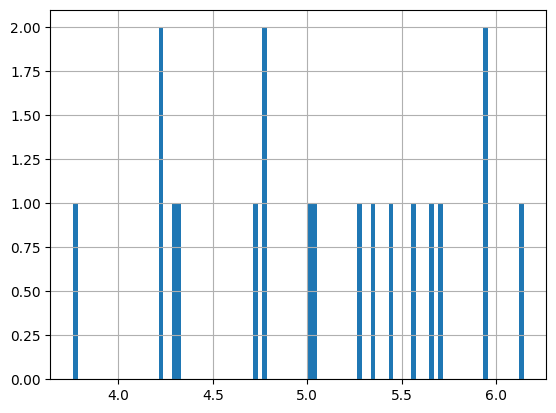

In [94]:
# revenue 히스토그램 : 로그 변환 후
np.log10(revenue_df[revenue_df.revenue > 0].revenue).hist(bins=100)

merge : feature + target value

In [96]:
feature_df = pd.merge(feature_df,
                      revenue_df,
                      how= 'left',
                      on = 'id'
                      )
feature_df

,id,host_id,neighbourhood_cleansed,latitude,review_scores_communication,beds,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,minimum_nights_avg_ntm,number_of_reviews_ltm,...,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h,revenue
0,198258,967537,Barking and Dagenham,51.53,4.88,1.00,1,0,2.00,1,...,75.00,0,0,1,0,0,0,0,1,0.00
1,33332,144444,Richmond upon Thames,51.46,4.53,1.00,2,0,2.00,0,...,NaN,0,0,1,0,0,0,0,0,NaN
2,42010,157884,Barnet,51.59,4.95,1.00,2,0,4.00,29,...,100.00,0,0,1,0,0,0,1,0,0.00
3,284603,1481851,Kensington and Chelsea,51.51,5.00,1.00,0,0,14.00,0,...,100.00,1,0,0,0,0,0,0,0,0.00
4,89870,54730,Islington,51.57,4.91,1.00,1,0,1.00,15,...,85.00,1,0,0,0,0,0,0,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91773,950589815013504257,501508071,Kensington and Chelsea,51.49,NaN,2.00,0,0,7.00,0,...,72.00,1,0,0,0,0,0,1,0,0.00
91774,951178246905249947,211074697,Lambeth,51.48,4.00,3.00,0,0,3.10,2,...,100.00,1,0,0,0,0,0,0,1,0.00
91775,951188392382129035,526113148,Kensington and Chelsea,51.48,5.00,4.00,0,0,1.00,2,...,95.00,1,0,0,0,0,0,0,1,0.00
91776,951192793768996976,56125082,Barnet,51.59,NaN,1.00,1,0,1.00,0,...,0.00,0,0,1,0,1,0,0,0,0.00


.fillna

In [97]:
# target value 가 null인 경우
feature_df[feature_df.revenue.isnull()]

,id,host_id,neighbourhood_cleansed,latitude,review_scores_communication,beds,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,minimum_nights_avg_ntm,number_of_reviews_ltm,...,host_acceptance_rate,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h,revenue
1,33332,144444,Richmond upon Thames,51.46,4.53,1.00,2,0,2.00,0,...,NaN,0,0,1,0,0,0,0,0,NaN
20,573374,2821391,Bromley,51.40,NaN,3.00,1,0,1.00,0,...,NaN,0,0,1,0,0,1,0,0,NaN
51,5571820,28887106,Hammersmith and Fulham,51.47,5.00,1.00,1,0,2.00,0,...,NaN,0,0,1,0,1,0,0,0,NaN
102,2854777,14094847,Hackney,51.55,5.00,5.00,0,0,7.00,3,...,25.00,1,0,0,0,0,1,0,0,NaN
140,3762111,13981850,Camden,51.52,NaN,3.00,0,0,30.00,0,...,NaN,1,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91667,906379083802015736,465168317,Bexley,51.50,NaN,1.00,1,0,1.00,0,...,0.00,0,0,1,0,0,0,0,0,NaN
91685,911250055778554163,409438338,Westminster,51.52,NaN,3.00,2,0,28.00,0,...,75.00,1,0,0,0,0,0,0,1,NaN
91716,925770055971667731,521190716,Havering,51.55,5.00,1.00,4,0,1.00,1,...,40.00,0,0,1,0,0,0,0,0,NaN
91721,928793748165554638,269308503,Ealing,51.51,4.75,4.00,30,0,14.00,4,...,94.00,1,0,0,0,0,0,0,1,NaN


In [98]:
# fill null revenue with 0
feature_df['revnenue'] = feature_df['revenue'].fillna(0)

In [99]:
# null 데이터 체크
feature_df[feature_df.revenue.isnull()]

,id,host_id,neighbourhood_cleansed,latitude,review_scores_communication,beds,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,minimum_nights_avg_ntm,number_of_reviews_ltm,...,room_entire,room_hotel,room_private,room_shared,response_3d,response_1d,response_3h,response_1h,revenue,revnenue
1,33332,144444,Richmond upon Thames,51.46,4.53,1.00,2,0,2.00,0,...,0,0,1,0,0,0,0,0,NaN,0.00
20,573374,2821391,Bromley,51.40,NaN,3.00,1,0,1.00,0,...,0,0,1,0,0,1,0,0,NaN,0.00
51,5571820,28887106,Hammersmith and Fulham,51.47,5.00,1.00,1,0,2.00,0,...,0,0,1,0,1,0,0,0,NaN,0.00
102,2854777,14094847,Hackney,51.55,5.00,5.00,0,0,7.00,3,...,1,0,0,0,0,1,0,0,NaN,0.00
140,3762111,13981850,Camden,51.52,NaN,3.00,0,0,30.00,0,...,1,0,0,0,0,0,0,0,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91667,906379083802015736,465168317,Bexley,51.50,NaN,1.00,1,0,1.00,0,...,0,0,1,0,0,0,0,0,NaN,0.00
91685,911250055778554163,409438338,Westminster,51.52,NaN,3.00,2,0,28.00,0,...,1,0,0,0,0,0,0,1,NaN,0.00
91716,925770055971667731,521190716,Havering,51.55,5.00,1.00,4,0,1.00,1,...,0,0,1,0,0,0,0,0,NaN,0.00
91721,928793748165554638,269308503,Ealing,51.51,4.75,4.00,30,0,14.00,4,...,1,0,0,0,0,0,0,1,NaN,0.00


학습 데이터 저장

In [101]:
# save as csv
feature_df.to_csv('drive/MyDrive/letuin/airbnb/data/feature.csv', index = False)